# Cloning shrinkai 'https://github.com/nikshrimali/shrinkai'

In [1]:
# Cloning shrinkai
!git clone https://github.com/nikshrimali/shrinkai

fatal: destination path 'shrinkai' already exists and is not an empty directory.


# Importing Libraries

In [2]:

import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau


from shrinkai.model.model_test import model_testing
from shrinkai.model.model_train import model_training

from shrinkai.data_process.getdata import GetCIFAR10_TrainData
from shrinkai.data_process.misclassified_data import *

import matplotlib.pyplot as plt
%matplotlib inline

device = "cuda" if torch.cuda.is_available else "cpu"
print(device)

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=(-10, 10), resample=False, expand=False)
    RandomAffine(degrees=(0, 0), scale=(0.8, 1.2), shear=(-10, 10))
    ColorJitter(brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=None)
    ToTensor()
    Normalize(mean=(0.491, 0.482, 0.446), std=(0.247, 0.243, 0.261))
)
cuda


# Importing Model

In [3]:
from shrinkai.model.QuizDNN import Net
model = Net().to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1, 32,


#  Downloading the dataset and applying transformations


In [4]:
os.chdir('D:\Python Projects\EVA')
print(os.getcwd())

data = GetCIFAR10_TrainData(os.chdir('D:\Python Projects\EVA'))
trainset = data.download_train_data()
testset = data.download_test_data()
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

D:\Python Projects\EVA
Files already downloaded and verified
Files already downloaded and verified


# Training the model

In [5]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=2, threshold=0.001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=True)
scheduler = StepLR(optimizer, step_size=25, gamma=0.1)

train_acc = []
train_losses = []
test_acc = []
test_losses = []

EPOCHS = 35

for i in range(EPOCHS):
    print(f'EPOCHS : {i}')
    model_training(model, device, trainloader, optimizer, train_acc, train_losses, l1_loss=False)
    scheduler.step()
    misclassified = model_testing(model, device, testloader, test_acc, test_losses)

  0%|          | 0/391 [00:00<?, ?it/s]EPOCHS : 0
Loss=1.3839044570922852 Batch_id=390 Accuracy=39.76: 100%|██████████| 391/391 [00:35<00:00, 11.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Test set: Average loss: 1.3503, Accuracy: 4915/10000 (49.15%)

EPOCHS : 1
Loss=1.1464473009109497 Batch_id=390 Accuracy=53.40: 100%|██████████| 391/391 [00:34<00:00, 11.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Test set: Average loss: 1.2372, Accuracy: 5505/10000 (55.05%)

EPOCHS : 2
Loss=1.2919399738311768 Batch_id=390 Accuracy=59.26: 100%|██████████| 391/391 [00:33<00:00, 11.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Test set: Average loss: 1.0852, Accuracy: 6069/10000 (60.69%)

EPOCHS : 3
Loss=0.8916146159172058 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
Test set: Average loss: 0.9469, Accuracy: 6609/10000 (66.09%)

EPOCHS : 4
Loss=0.8665441274642944 Batch_id=390 Accuracy=65.29: 100%|██████████| 391/391 [00:

KeyboardInterrupt: 

# Model Performance

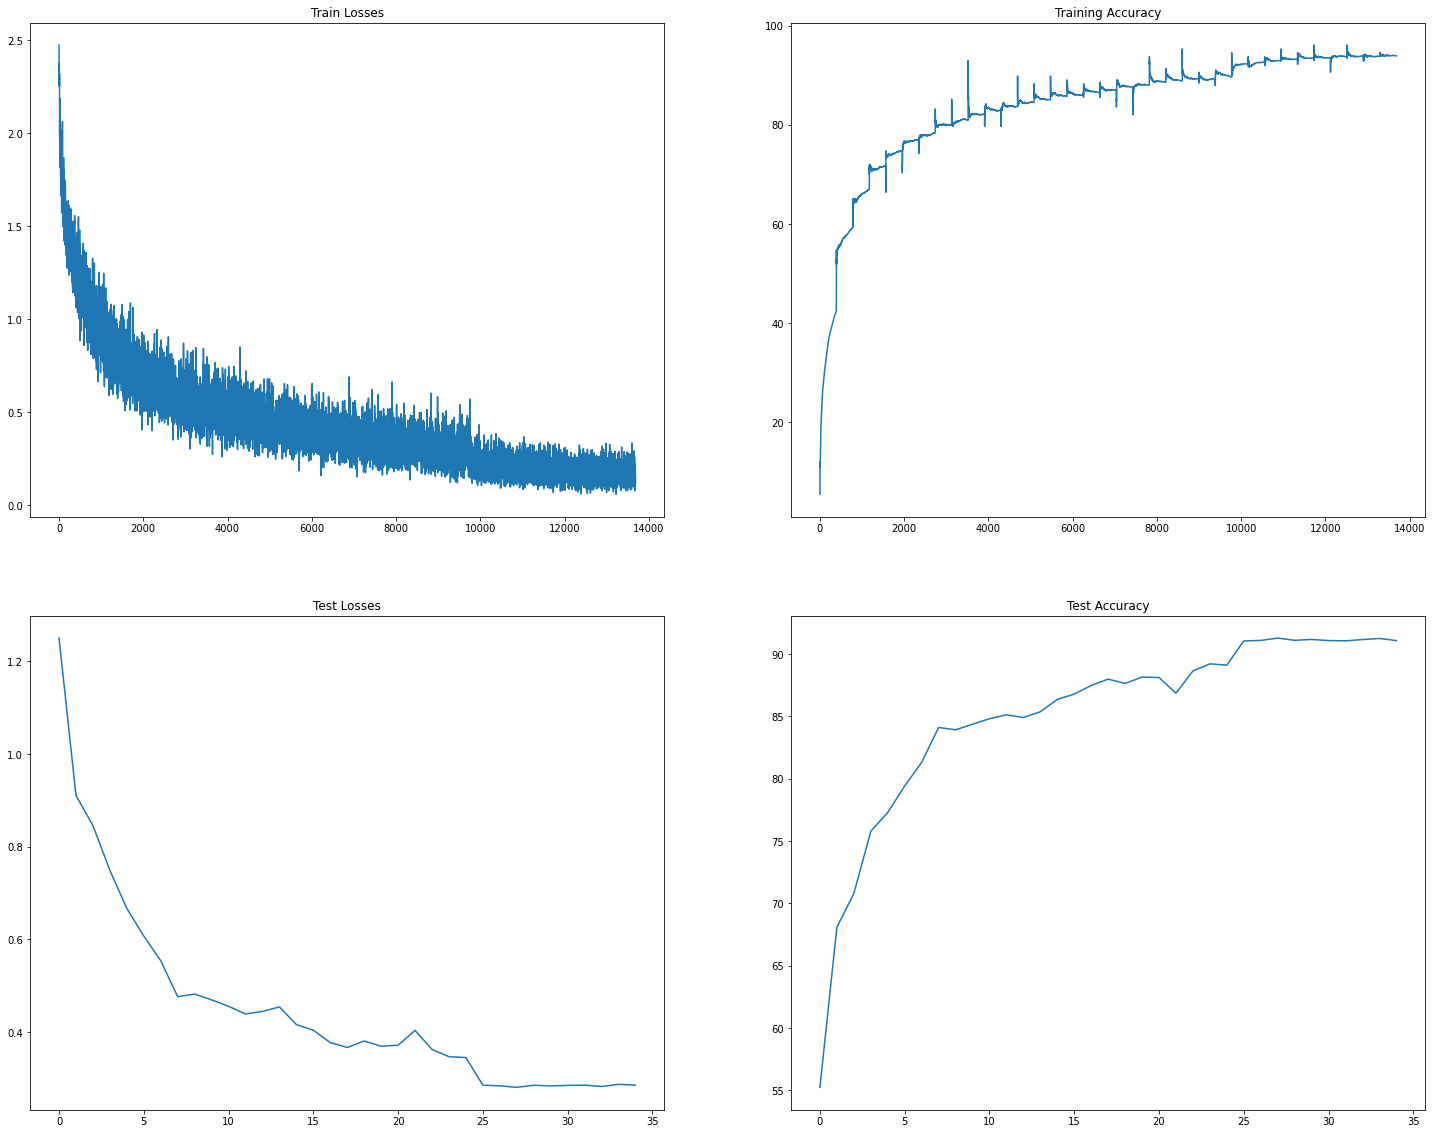

In [6]:

fig, axs = plt.subplots(2,2, figsize=(25,20))

axs[0,0].set_title('Train Losses')
axs[0,1].set_title('Training Accuracy')
axs[1,0].set_title('Test Losses')
axs[1,1].set_title('Test Accuracy')

axs[0,0].plot(train_losses)
axs[0,1].plot(train_acc)
axs[1,0].plot(test_losses)
axs[1,1].plot(test_acc)
